In [ ]:
import numpy as np

data = np.random.randn(1000000)

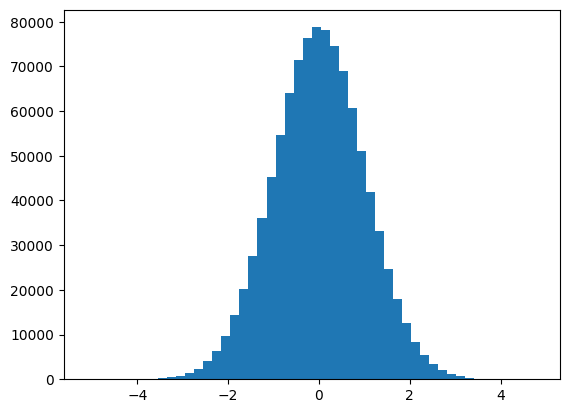

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data, bins=50)
plt.show()

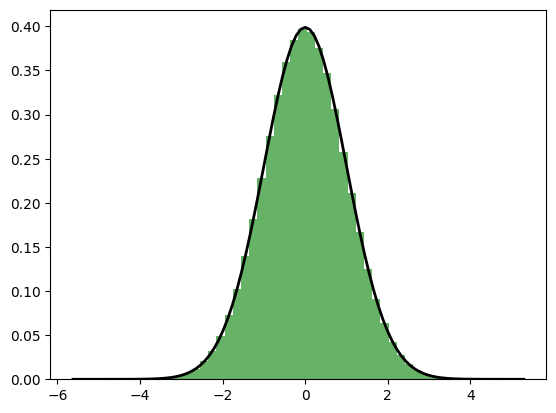

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 1. Generate 1M 2D normal random samples
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
samples = np.random.multivariate_normal(mean, cov, size=1_000_000)

# 2. Compute 2D histogram as density approximation
bins = 200
H, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins, density=True)

# 3. Prepare grid for surface plot
xcenters = 0.5 * (xedges[:-1] + xedges[1:])
ycenters = 0.5 * (yedges[:-1] + yedges[1:])
X, Y = np.meshgrid(xcenters, ycenters)

# 4. Create interactive 3D surface plot
fig = go.Figure(data=[
    go.Surface(x=X, y=Y, z=H.T, colorscale='Viridis')
])

fig.update_layout(
    title='3D Density of 1M 2D Normal Samples',
    scene=dict(
        xaxis_title='X₁',
        yaxis_title='X₂',
        zaxis_title='Density',
        aspectmode='cube'
    ),
    height=700
)

fig.show()
